   rainfall   crop soil_type  season       pesticide  success_rate
0       474   rice     black  summer  Copper Sulfate            53
1       161  wheat       red  summer      Glyphosate            70
2       469  wheat     black  winter     Carbendazim            77
3       248   rice       red   rainy        Mancozeb            98
4       172   rice       red  summer    Chlorpyrifos            75
rainfall        0
crop            0
soil_type       0
season          0
pesticide       0
success_rate    0
dtype: int64
           rainfall  success_rate
count  20000.000000  20000.000000
mean     274.324100     72.179000
std      130.191536     18.452506
min       50.000000     38.000000
25%      162.000000     57.000000
50%      272.000000     72.000000
75%      389.000000     87.000000
max      500.000000    100.000000


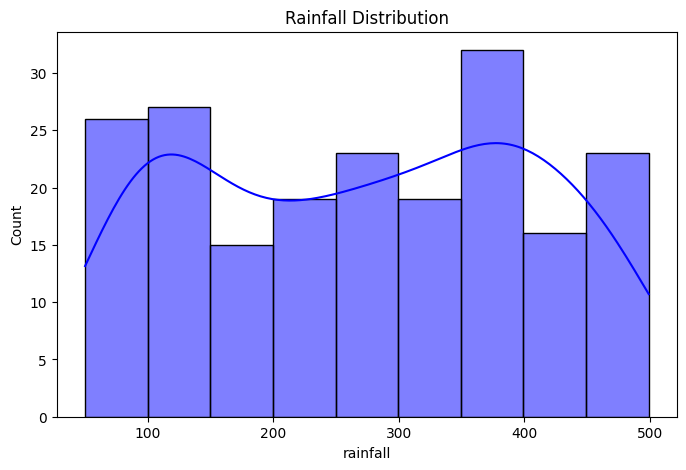

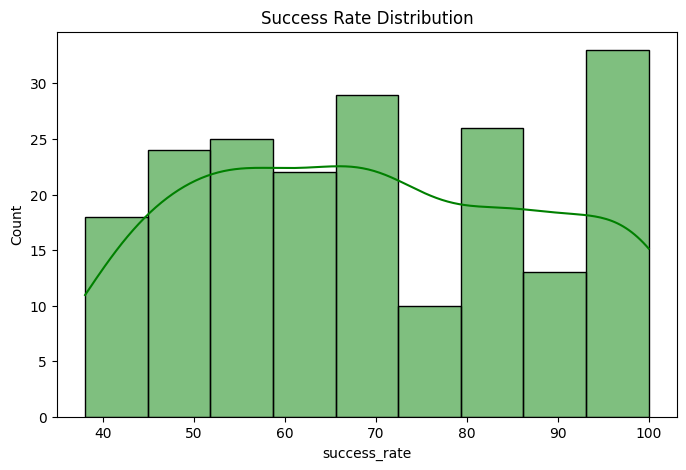

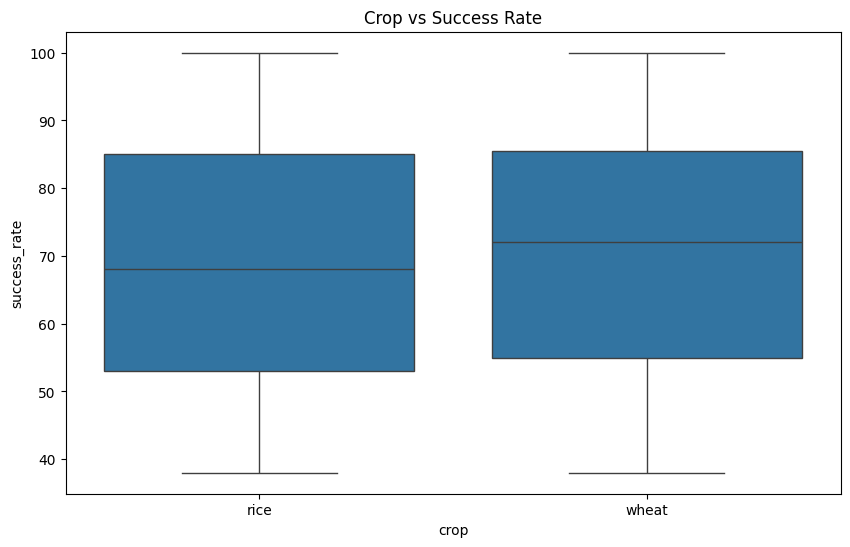

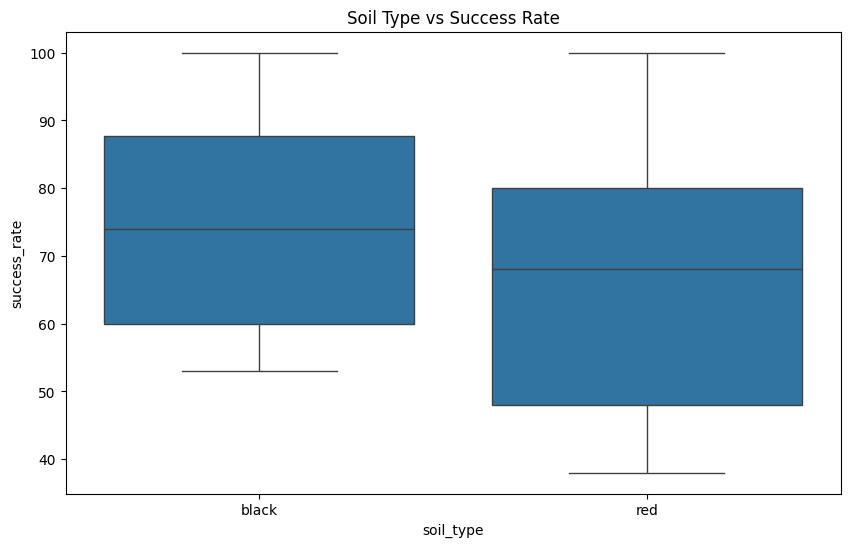

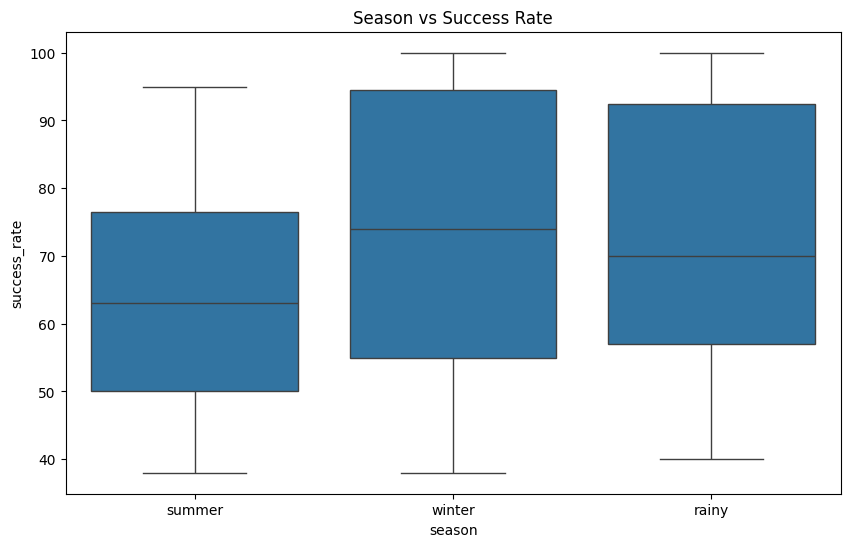

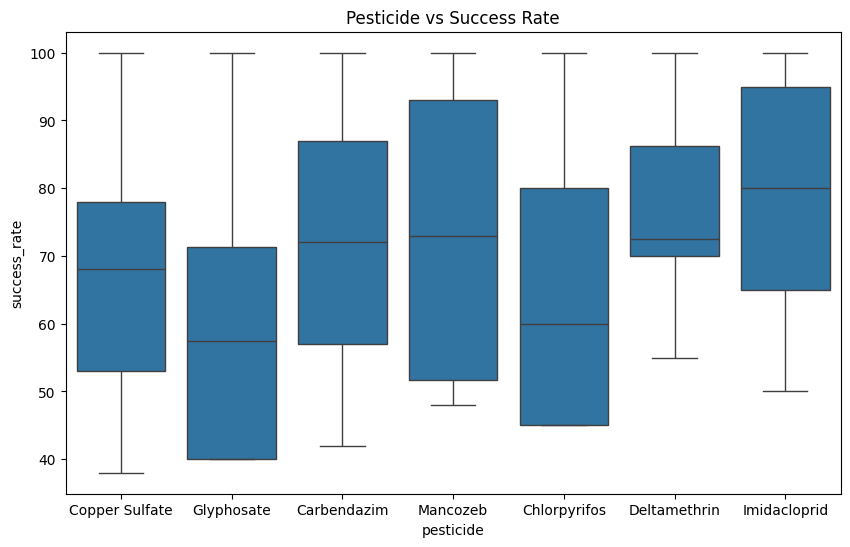

Label mappings saved to label_mappings.json
Mean Squared Error: 63.16203750000002


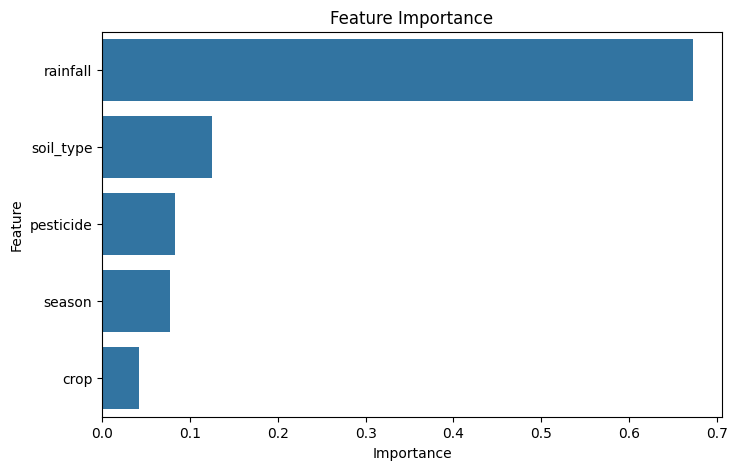

In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('crop_success.csv')

# Exploratory Data Analysis (EDA)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())
df=df[:200]

# Distribution of rainfall
plt.figure(figsize=(8, 5))
sns.histplot(df['rainfall'], kde=True, color='blue')
plt.title('Rainfall Distribution')
plt.show()

# Distribution of success rate
plt.figure(figsize=(8, 5))
sns.histplot(df['success_rate'], kde=True, color='green')
plt.title('Success Rate Distribution')
plt.show()

# Boxplot for categorical features vs success rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='crop', y='success_rate', data=df)
plt.title('Crop vs Success Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='soil_type', y='success_rate', data=df)
plt.title('Soil Type vs Success Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='success_rate', data=df)
plt.title('Season vs Success Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='pesticide', y='success_rate', data=df)
plt.title('Pesticide vs Success Rate')
plt.show()

# Data Preprocessing for Machine Learning

# Convert categorical variables into numeric using Label Encoding

label_encoders = {}
label_mappings = {}

for column in ['crop', 'soil_type', 'season', 'pesticide']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Convert the mappings to standard Python dictionaries with regular integers
json_serializable_label_mappings = {key: {k: int(v) for k, v in value.items()} for key, value in label_mappings.items()}

# Save label encoder values to JSON
mappings_file_path = 'label_mappings.json'
with open(mappings_file_path, 'w') as json_file:
    json.dump(json_serializable_label_mappings, json_file)

print(f'Label mappings saved to {mappings_file_path}')


# Split the dataset into features (X) and target (y)
X = df[['rainfall', 'crop', 'soil_type', 'season', 'pesticide']]
y = df['success_rate']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a RandomForest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the success rate on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


RandomForest: Best Mean Squared Error: 72.11057250000002
GradientBoosting: Best Mean Squared Error: 29.827050716353718
SVR: Best Mean Squared Error: 244.28252202955497
KNN: Best Mean Squared Error: 171.99298469387756
DecisionTree: Best Mean Squared Error: 101.2125
LinearRegression: Best Mean Squared Error: 271.3927929745947
RandomForest: Test Set Mean Squared Error: 63.60792
GradientBoosting: Test Set Mean Squared Error: 17.939587411502323
SVR: Test Set Mean Squared Error: 297.2369317156451
KNN: Test Set Mean Squared Error: 155.47397959183672
DecisionTree: Test Set Mean Squared Error: 102.5
LinearRegression: Test Set Mean Squared Error: 321.76779795676475


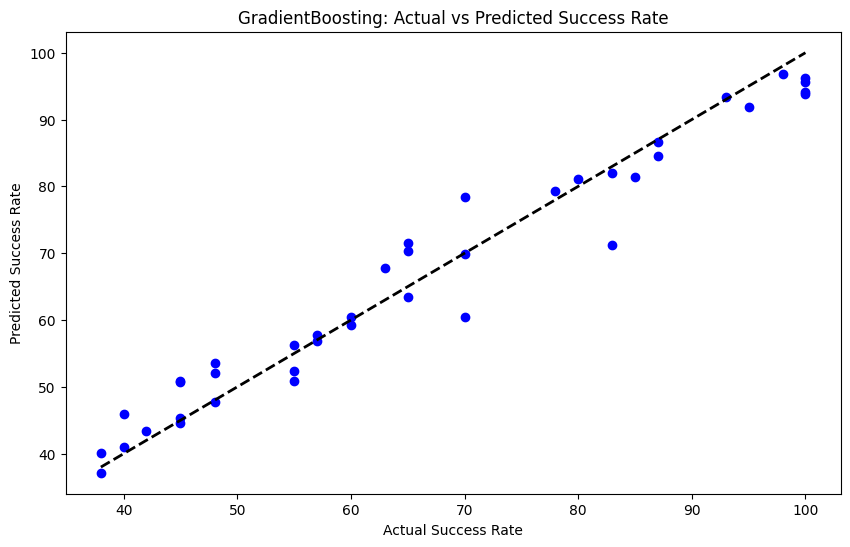

In [9]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings("ignore")


# Label Encoding for categorical features
le = LabelEncoder()
df['crop'] = le.fit_transform(df['crop'])
df['soil_type'] = le.fit_transform(df['soil_type'])
df['season'] = le.fit_transform(df['season'])
df['pesticide'] = le.fit_transform(df['pesticide'])

# Split the dataset into features (X) and target (y)
X = df[['rainfall', 'crop', 'soil_type', 'season', 'pesticide']]
y = df['success_rate']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary of models to evaluate
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'LinearRegression': LinearRegression()
}

# Grid search parameters for different models
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100],
        'max_depth': [10, 20, None]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7]
    },
    'DecisionTree': {
        'max_depth': [10, 20, None]
    }
}

# Perform Grid Search on each model and get the best score
best_estimators = {}
best_scores = {}

for model_name in models.keys():
    model = models[model_name]
    grid = GridSearchCV(estimator=model, param_grid=param_grid.get(model_name, {}), cv=5, scoring='neg_mean_squared_error')

    # Fitting the model
    grid.fit(X_train, y_train)

    # Storing the best estimator and score
    best_estimators[model_name] = grid.best_estimator_
    best_scores[model_name] = -grid.best_score_  # Convert to positive for MSE

# Display the best models and their corresponding scores
for model_name, score in best_scores.items():
    print(f"{model_name}: Best Mean Squared Error: {score}")

# Evaluate the best models on the test set
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name}: Test Set Mean Squared Error: {mse}")

# Plot the best performing model's predictions vs actuals
best_model_name = min(best_scores, key=best_scores.get)
best_model = best_estimators[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Success Rate')
plt.ylabel('Predicted Success Rate')
plt.title(f'{best_model_name}: Actual vs Predicted Success Rate')
plt.show()


In [10]:
import joblib
import json

# Select the best model based on the lowest MSE from previous evaluation
best_model_name = min(best_scores, key=best_scores.get)
best_model = best_estimators[best_model_name]

# Export the best model using joblib
model_file_path = 'best_crop_success_model.pkl'  # You can specify your path
joblib.dump(best_model, model_file_path)

# Extract model coefficients (feature importances for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    coefficients = best_model.feature_importances_.tolist()
else:
    coefficients = best_model.coef_.tolist() if hasattr(best_model, 'coef_') else None

# Create a JSON structure for the model details
model_info = {
    'model_name': best_model_name,
    'coefficients': coefficients,
    'feature_names': X.columns.tolist()
}

# Save the model information to a JSON file
model_info_file_path = 'best_model_info.json'  # You can specify your path
with open(model_info_file_path, 'w') as json_file:
    json.dump(model_info, json_file)

print(f'Model saved to {model_file_path}')
print(f'Model info saved to {model_info_file_path}')




Model saved to best_crop_success_model.pkl
Model info saved to best_model_info.json
